In [83]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set()
heart_attack = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

y_data = heart_attack['HeartDiseaseorAttack']
x_data = heart_attack.drop('HeartDiseaseorAttack', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 100)

model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45981
         1.0       0.55      0.13      0.21      4755

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736

[[45469   512]
 [ 4136   619]]


In [84]:
y_pred = model.predict_proba(x_test)
print(y_pred)
print(predictions)

[[0.95113085 0.04886915]
 [0.98468251 0.01531749]
 [0.95818558 0.04181442]
 ...
 [0.93580291 0.06419709]
 [0.98438554 0.01561446]
 [0.97419779 0.02580221]]
[0. 0. 0. ... 0. 0. 0.]


In [85]:
for i in range(len(predictions)):
    if predictions[i]==1:
        print(y_pred[i][1])

0.6301355432269884
0.553771155729451
0.6137511905227163
0.6817142775368005
0.5682330321030765
0.7718915845774317
0.5090616334734583
0.5685496671165774
0.5903083070959533
0.5604129501678755
0.6836430695572577
0.5967555350333182
0.6952209921343222
0.5199213467291819
0.5168516121389214
0.7114181869163749
0.6995766546842401
0.5180062118500586
0.5369336937214316
0.5752358318300701
0.6309978516188368
0.5695821529413055
0.6685101165840719
0.6587538907775126
0.5744310238428186
0.7228703488722497
0.5349741702445073
0.6179889560268549
0.770762553141529
0.5724510057005384
0.6937118826717802
0.5461462727848416
0.5573525998280296
0.9113746285608448
0.765390802137781
0.6497001235664374
0.733922216339046
0.5398476565123701
0.669765114868704
0.542201266168026
0.6350590847176283
0.6724116613879595
0.7419426375995507
0.6156409654358249
0.7690831472770749
0.5135138091531414
0.673535227211343
0.5478317948129072
0.674166863120767
0.5324642093792401
0.5537687918505572
0.5121933760704485
0.6234671104594881
0

In [86]:
predictions_new=[]
for i in range(len(y_pred)):
    if y_pred[i][1]>=0.5:
        predictions_new.append(1.0)
    else:
        predictions_new.append(0.0)
print(classification_report(y_test, predictions_new))
print(confusion_matrix(y_test, predictions_new))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45981
         1.0       0.55      0.13      0.21      4755

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736

[[45469   512]
 [ 4136   619]]


['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
['Sex', 'Age', 'Education', 'Income']
{'HighBP': 0.20936121068998662, 'HighChol': 0.1807653548898247, 'CholCheck': 0.04420580983750528, 'BMI': 0.052904256455500585, 'Smoker': 0.11444121771032613, 'Stroke': 0.20300193998998678, 'Diabetes': 0.18027168633544086, 'PhysActivity': -0.08729898692445319, 'Fruits': -0.01979034790860583, 'Veggies': -0.039167409036265685, 'HvyAlcoholConsump': -0.028990515666544772, 'AnyHealthcare': 0.018734186262239334, 'NoDocbcCost': 0.030999704754872424, 'GenHlth': 0.25838340865847725, 'MentHlth': 0.0646212919692998, 'PhysHlth': 0.18169753577546896, 'DiffWalk': 0.212708695290283}
1.752096298619212
-0.17524725953586945
{'HighBP': 0.11949184006323141, 'HighChol': 0.10317090164067001, 'CholCheck': 0.025230239840323215, 'BMI': 0.030194833752684287, 'Smoker'

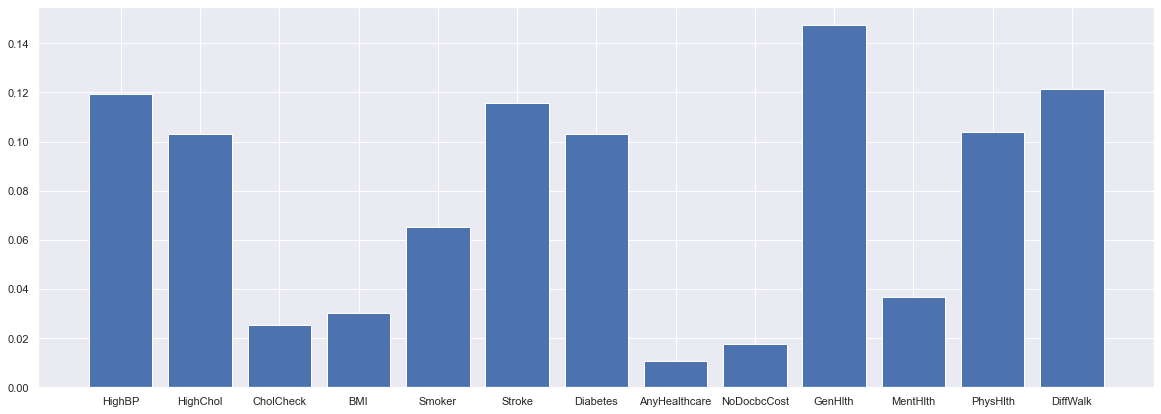

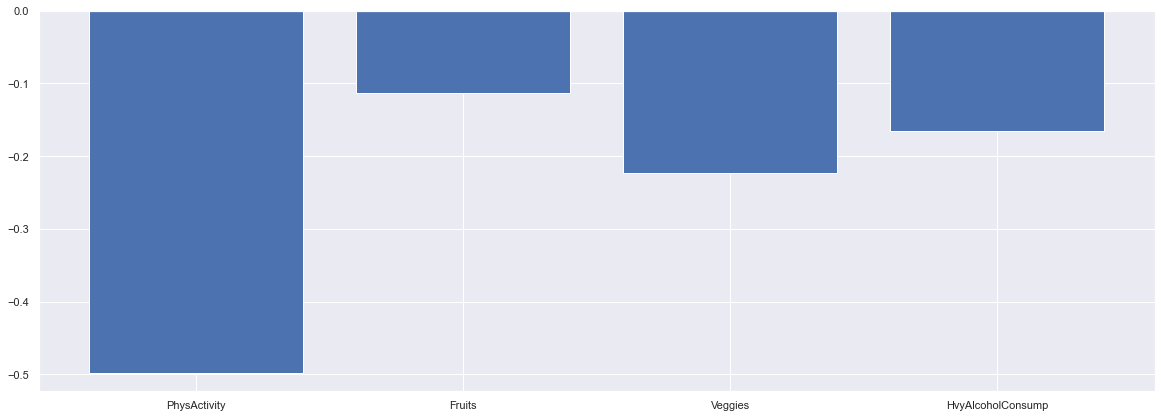

In [110]:
import csv
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

index=[]
other=[]
with open('heart_disease_health_indicators_BRFSS2015.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    for row in csv_reader:
        for i in row:
            if i!='HeartDiseaseorAttack' and i!='Sex' and i!='Age' and i!='Education' and i!='Income':
                index.append(i)
            elif i=='Sex' or i=='Age' or i=='Education' or i=='Income':
                other.append(i)
        break
csv_file.close()
print(index)
print(other)
corr={}
sum1=0
sum2=0
for i in index:
    corr[i]=pearsonr(heart_attack[i], heart_attack['HeartDiseaseorAttack'])[0]
    if corr[i]>0:
        sum1+=corr[i]
    elif corr[i]<0:
        sum2+=corr[i]
print(corr)
print(sum1)
print(sum2)
sum1_new=0
sum2_new=0
for i in index:
    if corr[i]>0:
        corr[i]=corr[i]/sum1
        sum1_new+=corr[i]
    elif corr[i]<0:
        corr[i]=corr[i]/(sum2*-1)
        sum2_new+=corr[i]
print(corr)
print(sum1_new)
print(sum2_new)

x_value1=[]
x_value2=[]
y_value1=[]
y_value2=[]
for i in index:
    if corr[i]>0:
        x_value1.append(i)
        y_value1.append(corr[i])
    else:
        x_value2.append(i)
        y_value2.append(corr[i])

fig = plt.figure(figsize =(20, 7))
plt.bar(x_value1, y_value1)
plt.show()

fig = plt.figure(figsize =(20, 7))
plt.bar(x_value2, y_value2)
plt.show()

In [111]:
for i in index:
    print(i+": "+str(list(set(heart_attack[i]))))
for i in other:
    print(i+": "+str(list(set(heart_attack[i]))))

HighBP: [0.0, 1.0]
HighChol: [0.0, 1.0]
CholCheck: [0.0, 1.0]
BMI: [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 95.0, 96.0, 98.0]
Smoker: [0.0, 1.0]
Stroke: [0.0, 1.0]
Diabetes: [0.0, 1.0, 2.0]
PhysActivity: [0.0, 1.0]
Fruits: [0.0, 1.0]
Veggies: [0.0, 1.0]
HvyAlcoholConsump: [0.0, 1.0]
AnyHealthcare: [0.0, 1.0]
NoDocbcCost: [0.0, 1.0]
GenHlth: [1.0, 2.0, 3.0, 4.0, 5.0]
MentHlth: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0

In [112]:
array_new1={}
array_new2={}
index1=[]
index2=[]
for i in index:
    if corr[i]>0:
        array_new1[i]=heart_attack[i]
        array_new1[i]=array_new1[i]/max(array_new1[i])*corr[i]
        index1.append(i)
    else:
        array_new2[i]=heart_attack[i]
        array_new2[i]=(-1)*(array_new2[i]/max(array_new2[i])*corr[i])
        index2.append(i)
print(array_new1)
print(array_new2)
print(index1)
print(index2)

{'HighBP': 0         0.119492
1         0.000000
2         0.119492
3         0.119492
4         0.119492
            ...   
253675    0.119492
253676    0.119492
253677    0.000000
253678    0.119492
253679    0.119492
Name: HighBP, Length: 253680, dtype: float64, 'HighChol': 0         0.103171
1         0.000000
2         0.103171
3         0.000000
4         0.103171
            ...   
253675    0.103171
253676    0.103171
253677    0.000000
253678    0.000000
253679    0.103171
Name: HighChol, Length: 253680, dtype: float64, 'CholCheck': 0         0.02523
1         0.00000
2         0.02523
3         0.02523
4         0.02523
           ...   
253675    0.02523
253676    0.02523
253677    0.02523
253678    0.02523
253679    0.02523
Name: CholCheck, Length: 253680, dtype: float64, 'BMI': 0         0.012324
1         0.007703
2         0.008627
3         0.008319
4         0.007395
            ...   
253675    0.013865
253676    0.005546
253677    0.008627
253678    0.007087
253679  

In [113]:
grades=[]
for i in range(253680):
    grade1=0
    for j in index1:
        grade1+=array_new1[j][i]
    grades1.append(grade1)
    grade2=0
    for j in index2:
        grade2+=array_new2[j][i]
    grades2.append(grade2)
    grades.append([grade1, grade2])

In [114]:
y_old=[]
for i in heart_attack['HeartDiseaseorAttack']:
    y_old.append(i)

{0.0: (141974, 10205), 1.0: (111706, 13688)}
{0.0: 0.07187935819234507, 1.0: 0.12253594256351494}
{1.0: (5700, 29), 2.0: (7598, 54), 3.0: (11123, 126), 4.0: (13823, 193), 5.0: (16157, 351), 6.0: (19819, 712), 7.0: (26314, 1425), 8.0: (30832, 2253), 9.0: (33244, 3358), 10.0: (32194, 4193), 11.0: (23533, 3947), 12.0: (15980, 3093), 13.0: (17363, 4159)}
{1.0: 0.005087719298245614, 2.0: 0.007107133456172677, 3.0: 0.011327879169288861, 4.0: 0.013962236851624104, 5.0: 0.021724330011759607, 6.0: 0.035925122357333875, 7.0: 0.05415368245040663, 8.0: 0.07307343020238713, 9.0: 0.10101070869931417, 10.0: 0.13024165993663417, 11.0: 0.16772192240683295, 12.0: 0.19355444305381728, 13.0: 0.2395323388815297}
{1.0: (174, 29), 2.0: (4043, 778), 3.0: (9478, 1618), 4.0: (62750, 7467), 5.0: (69910, 6918), 6.0: (107325, 7083)}
{1.0: 0.16666666666666666, 2.0: 0.1924313628493693, 3.0: 0.17071112048955475, 4.0: 0.11899601593625499, 5.0: 0.09895580031469031, 6.0: 0.0659958071278826}
{1.0: (9811, 1553), 2.0: (117

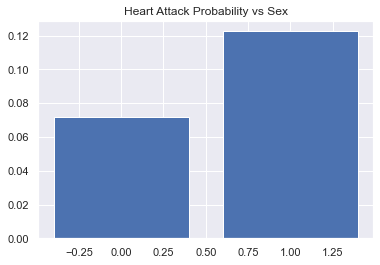

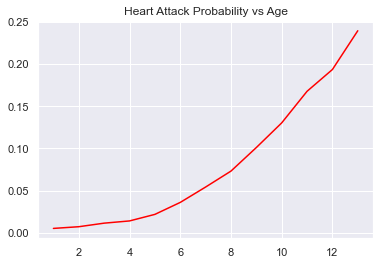

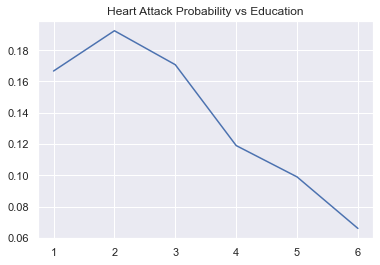

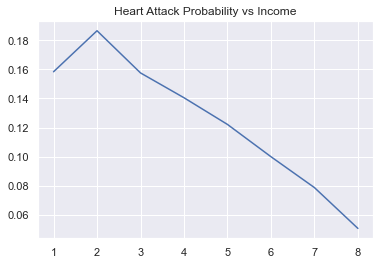

In [119]:
sex={}
sex_probability={}
for i in list(set(heart_attack['Sex'])):
    total=0
    yes=0
    for j in range(253680):
        if heart_attack['Sex'][j]==i:
            total+=1
            if heart_attack['HeartDiseaseorAttack'][j]==1.0:
                yes+=1
    sex[i]=(total, yes)
    sex_probability[i]=yes/total
print(sex)
print(sex_probability)

age={}
age_probability={}
for i in list(set(heart_attack['Age'])):
    total=0
    yes=0
    for j in range(253680):
        if heart_attack['Age'][j]==i:
            total+=1
            if heart_attack['HeartDiseaseorAttack'][j]==1.0:
                yes+=1
    age[i]=(total, yes)
    age_probability[i]=yes/total
print(age)
print(age_probability)

education={}
education_probability={}
for i in list(set(heart_attack['Education'])):
    total=0
    yes=0
    for j in range(253680):
        if heart_attack['Education'][j]==i:
            total+=1
            if heart_attack['HeartDiseaseorAttack'][j]==1.0:
                yes+=1
    education[i]=(total, yes)
    education_probability[i]=yes/total
print(education)
print(education_probability)

income={}
income_probability={}
for i in list(set(heart_attack['Income'])):
    total=0
    yes=0
    for j in range(253680):
        if heart_attack['Income'][j]==i:
            total+=1
            if heart_attack['HeartDiseaseorAttack'][j]==1.0:
                yes+=1
    income[i]=(total, yes)
    income_probability[i]=yes/total
print(income)
print(income_probability)

x_value1=[]
y_value1=[]
for i in list(set(heart_attack['Sex'])):
    x_value1.append(i)
    y_value1.append(sex_probability[i])
plt.bar(x_value1, y_value1)
plt.title("Heart Attack Probability vs Sex")
plt.show()

x_value2=[]
y_value2=[]
for i in list(set(heart_attack['Age'])):
    x_value2.append(i)
    y_value2.append(age_probability[i])
plt.plot(x_value2, y_value2, color='red')
plt.title("Heart Attack Probability vs Age")
plt.show()

x_value3=[]
y_value3=[]
for i in list(set(heart_attack['Education'])):
    x_value3.append(i)
    y_value3.append(education_probability[i])
plt.plot(x_value3, y_value3)
plt.title("Heart Attack Probability vs Education")
plt.show()

x_value4=[]
y_value4=[]
for i in list(set(heart_attack['Income'])):
    x_value4.append(i)
    y_value4.append(income_probability[i])
plt.plot(x_value4, y_value4)
plt.title("Heart Attack Probability vs Income")
plt.show()

[[7095, 618], [158734, 13146], [74114, 8445], [11190, 1391], [1679, 214]]
[0.08710359408033827, 0.08281779580934141, 0.11394608306123, 0.12430741733690795, 0.12745681953543775]


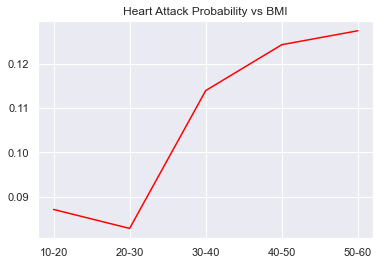

In [124]:
BMI=[]
for i in range(5):
    BMI.append([0, 0])
BMI_probability=[]
for i in range(253680):
    for j in range(1, 6):
        if j*10<=heart_attack['BMI'][i]<j*10+10:
            BMI[j-1][0]+=1
            if heart_attack['HeartDiseaseorAttack'][i]==1.0:
                BMI[j-1][1]+=1
for i in BMI:
    BMI_probability.append(i[1]/i[0])
print(BMI)
print(BMI_probability)

x_value5=[]
for i in range(1, 6):
    x_value5.append(str(i*10)+"-"+str(i*10+10))
y_value5=BMI_probability
plt.plot(x_value5, y_value5, color='red')
plt.title("Heart Attack Probability vs BMI")
plt.show()

In [101]:
for i in range(253680):
    if sex_probability[heart_attack['Sex'][i]]>=0.1:
        grades[i].append(True)
    else:
        grades[i].append(False)
    if age_probability[heart_attack['Age'][i]]>=0.1:
        grades[i].append(True)
    else:
        grades[i].append(False)
    if education_probability[heart_attack['Education'][i]]>=0.1:
        grades[i].append(True)
    else:
        grades[i].append(False)
    if income_probability[heart_attack['Income'][i]]>=0.1:
        grades[i].append(True)
    else:
        grades[i].append(False)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(grades, y_old, test_size = 0.2, random_state = 100)
x_train1=[]
x_train2=[]
for i in x_train:
    x_train1.append(i[0])
    x_train2.append(i[1])
x_test1=[]
x_test2=[]
risk=[]
for i in x_test:
    x_test1.append(i[0])
    x_test2.append(i[1])
    row=i[2:]
    risk.append(row)

model1 = LogisticRegression(max_iter = 1000)
model1.fit(np.array(x_train1).reshape(-1, 1), y_train)
y_pred1 = model1.predict(np.array(x_test1).reshape(-1, 1))
y_pred_proba1 = model1.predict_proba(np.array(x_test1).reshape(-1, 1))
model2 = LogisticRegression(max_iter = 1000)
model2.fit(np.array(x_train2).reshape(-1, 1), y_train)
y_pred2 = model2.predict(np.array(x_test2).reshape(-1, 1))
y_pred_proba2 = model2.predict_proba(np.array(x_test2).reshape(-1, 1))

differences=[]
for i in range(len(y_test)):
    if y_pred_proba1[i][1]-y_pred_proba2[i][1]>=0:
        differences.append(y_pred_proba1[i][1]-y_pred_proba2[i][1])
    else:
        differences.append(-(y_pred_proba1[i][1]-y_pred_proba2[i][1]))
q1 = np.percentile(differences, 25)
q3 = np.percentile(differences, 75)
IQR=q3-q1
outliers=[]
for i in differences:
    if i<q1-1.5*IQR or i>q3+1.5*IQR:
        outliers.append(i)

predictions=[]
for i in range(len(y_test)):
    if y_pred1[i]==1.0 and y_pred2[i]==1.0:
        predictions.append(1.0)
    elif y_pred1[i]!=y_pred2[i]:
        change=0
        if y_pred_proba1[i][1]-y_pred_proba2[i][1]>=0:
            change+=y_pred_proba1[i][1]-y_pred_proba2[i][1]
        else:
            change+=-(y_pred_proba1[i][1]-y_pred_proba2[i][1])
        if change in outliers:
            if True in risk[i]:
                predictions.append(1.0)
            else:
                predictions.append(0.0)
        else:
            predictions.append(1.0)
    else:
        predictions.append(0.0)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45981
         1.0       0.48      0.08      0.14      4755

    accuracy                           0.91     50736
   macro avg       0.70      0.54      0.54     50736
weighted avg       0.87      0.91      0.87     50736

[[45581   400]
 [ 4379   376]]


In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(grades, y_old, test_size = 0.2, random_state = 100)
x_train1=[]
x_train2=[]
for i in x_train:
    x_train1.append(i[0])
    x_train2.append(i[1])
x_test1=[]
x_test2=[]
for i in x_test:
    x_test1.append(i[0])
    x_test2.append(i[1])

scaler=StandardScaler()
NB1=GaussianNB()
scaler.fit(np.array(x_train1).reshape(-1, 1))
NB1.fit(np.array(x_train1).reshape(-1, 1), np.asarray(y_train))
y_pred1 = NB1.predict(scaler.transform(np.array(x_test1).reshape(-1, 1)))
y_pred_proba1 = NB1.predict_proba(scaler.transform(np.array(x_test1).reshape(-1, 1)))
NB2=GaussianNB()
scaler.fit(np.array(x_train2).reshape(-1, 1))
NB2.fit(np.array(x_train2).reshape(-1, 1), np.asarray(y_train))
y_pred2 = NB2.predict(scaler.transform(np.array(x_test2).reshape(-1, 1)))
y_pred_proba2 = NB2.predict_proba(scaler.transform(np.array(x_test2).reshape(-1, 1)))

differences=[]
for i in range(len(y_test)):
    differences.append(y_pred_proba1[i][1]-y_pred_proba2[i][1])
q1 = np.percentile(differences, 25)
q3 = np.percentile(differences, 75)
IQR=q3-q1
outliers=[]
for i in differences:
    if i<(q1-1.5*IQR) or i>(q3+1.5*IQR):
        outliers.append(i)

predictions=[]
for i in range(len(y_test)):
    if y_pred1[i]==1.0 and y_pred2[i]==1.0:
        predictions.append(1.0)
    elif y_pred1[i]!=y_pred2[i]:
        if y_pred_proba1[i][1]-y_pred_proba2[i][1]>q3+1.5*IQR:
            predictions.append(1.0)
        elif y_pred_proba1[i][1]-y_pred_proba2[i][1]<q1-1.5*IQR and y_pred1[i]==1.0:
            predictions.append(1.0)
        else:
            predictions.append(0.0)
    else:
        predictions.append(0.0)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     45981
         1.0       0.27      0.50      0.35      4755

    accuracy                           0.83     50736
   macro avg       0.61      0.68      0.62     50736
weighted avg       0.88      0.83      0.85     50736

[[39606  6375]
 [ 2400  2355]]
